# Chapter 3 & 4 Homework - Addie Morrison Q688R999
## Quick Clarifications
- Both have been used in lecture, I'm using `.DATA` instead of `global variables`

In [1]:
import graphviz
%load_ext tikzmagic

## 2 - Address Space
A proc's address space consists of bytecode (.CODE), global variables (.DATA), stack, stack for other threads, and heap
On X86, the stack grows upward, in that order

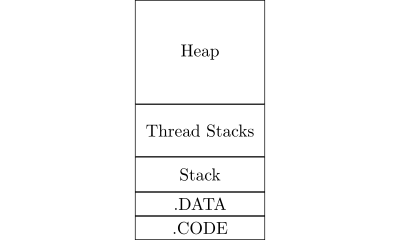

In [2]:
%%tikz -f svg -l positioning
\tikzset{every node/.style={draw, minimum width=75pt}}
\tikzset{node distance=0}
\node [rectangle] at (0,0) (code){.CODE};
\node [rectangle, above=of code] (data){.DATA};
\node [rectangle, above=of data, minimum height=20pt] (stack) {Stack};
\node [rectangle, above=of stack, minimum height=30pt] (otherstack) {Thread Stacks};
\node [rectangle, above=of otherstack, minimum height=60pt] (heap) {Heap};

## 6 - Context switching
Context switching is the act of the CPU moving from executing one process to another. Context switches happen whenever a process moves from running to another state. Information about suspended processes is stored in the process control block / PCB

## 8 - Queues
The jobs queue contains processes that have been requested to run, but not initialized in any way. The ready queue contains processes that have been loaded from disk, and are ready to be executed. Device queues contain processes that are requesting IOs from that device. 

In practice these queues are fantastic works of engineering with all sorts of speculation and profiling magic to keep the system running smoothly. In this class, we're representing them as simple FIFO lists / queues

## 9 - Schedulers
The long term scheduler picks processes to be run (IE handling the jobs queue). It runs on a rather long period (several hundred milliseconds), and aims for a mix of IO and CPU bound tasks.

The short term scheduler runs on a very short period, and takes processes from the ready queue and allows them to execute.

## 10 - Degree of multiprogramming
The number of tasks that are being executed at a time -- controlled by the jobs queue / long term scheduler

## 13 - Child process modes
(assuming a linux-style process creation api)

Simply remove the `wait(2)` and continue about your business

```c
...
    x = fork();
    if (x == 0)
        execve(command, parameters, 0);
}
```

## 14 - Process tree
### What will be printed?
It varies, but something like [without column-ization]
```
              ...cont'd      ...cont'd
0 In parent   2 In parent    1 In child
1 In parent   0 In parent    2 In parent
2 In parent   1 In child     0 In parent
0 In parent   2 In child     1 In child
1 In parent   0 In child     2 In parent
2 In child    1 In parent    0 In child
0 In child    2 In child     1 In child
1 In parent   0 In child     2 In child
cont'd...     cont'd...
```

The variation is due to the fact that the processes aren't synchronized in any way, so the Short-Term scheduler can pick any one of them to run. The code could be modified to...

- Force synchronization with IPC (this could let one thread be `fork(2)`ing when another is writing the the console)
- Or (for rational people) you could simply have the parent `wait(2)` for the child before printing its message

---

Process tree on next page

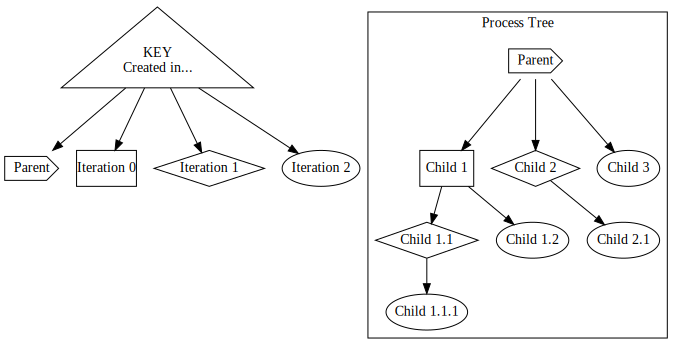

In [3]:
import graphviz
master = graphviz.Digraph()

key = graphviz.Digraph(name='Key')
key.node('key', label='KEY\nCreated in...', shape='triangle')
key.node('Parent', shape='cds')
key.node('Iteration 0', shape='rect')
key.node('Iteration 1', shape='diamond')
key.node('Iteration 2')
key.edge('key', 'Parent')
key.edge('key', 'Iteration 0')
key.edge('key', 'Iteration 1')
key.edge('key', 'Iteration 2')
master.subgraph(key)

tree = graphviz.Digraph(name='cluster_tree')
tree.body.append('label="Process Tree"')
tree.node('0', label='Parent', shape='cds')
tree.node('1', label='Child 1', shape='rect')
tree.node('2', label='Child 2', shape='diamond')
tree.node('3', label='Child 3')
tree.node('1.1', label='Child 1.1', shape='diamond')
tree.node('1.2', label='Child 1.2',)
tree.node('1.1.1', label='Child 1.1.1')
tree.node('2.1', label='Child 2.1')
tree.edge('0', '1')
tree.edge('0', '2')
tree.edge('0', '3')
tree.edge('1', '1.1')
tree.edge('1', '1.2')
tree.edge('1.1', '1.1.1')
tree.edge('2', '2.1')
master.subgraph(tree)
master

## 19 - Thread resources
All threads in a process share their...
- .CODE
- .DATA
- Heap

Each thread get its own stack, because if local variables were shared, that would make practical multithreaded programming virtually impossible

## 22/Exercise 4.17 - Pthreads
`runner` would execute before either `printf`, so...
- Line C: `CHILD: value = 5`
- Line P: `PARENT: value = 5`